# Statistical Testing



![](https://cdn.scribbr.com/wp-content/uploads/2020/01/flowchart-for-choosing-a-statistical-test-993x1024.png)

**Aim:** Acquire knowledge and experience in the area of statistical testing

**Objctives:**
- Research and understand how and when to use core statisitcal testing methods
- Ask and Answer questions that can be answered using one or more statistical tests on the dataset found

**Imports**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

sns.set_style('whitegrid')
plt.style.use('seaborn')

## About Statistical Testing

### Parametric vs Non-Parametric tests


***What is the difference between a parametric and a non-parametric test ?***

<br/>

**Parametric tests** assume underlying statistical distributions in the data, therefore, several conditions of validity must be met so that the result of a parametric test is reliable. 

<br/>

**Non-parametric tests** do not rely on any distribution, thus can be applied even if parametric conditions of validity are not met. 

<br/>


***What is the advantage of using a non-parametric test ?***

Non-parametric tests are more robust than parametric tests. In other words, they are valid in a broader range of situations (fewer conditions of validity).  
<br/>

***What is the advantage of using a parametric test ?***

The advantage of using a parametric test instead of a non-parametric equivalent is that the former will have more statistical power than the latter. 

In other words, a parametric test is more able to lead to a rejection of H0. Most of the time, the p-value associated to a parametric test will be lower than the p-value associated to a nonparametric equivalent that is run on the same data.

![](https://www.researchgate.net/profile/Trisha_Greenhalgh/publication/13950781/figure/tbl1/AS:601648527331338@1520455595547/Some-commonly-used-statistical-tests.png)

### T test

![](https://www.gstatic.com/education/formulas2/-1/en/student_s_t_test.svg)

$t$	=	Student's t-test

$m$	=	mean

$\mu$	=	theoretical value

$s$	=	standard deviation

${n}$	=	variable set size

The Student’s t-Test is a statistical hypothesis test for testing whether two samples are expected to have been drawn from the same population.

It is named for the pseudonym “Student” used by William Gosset, who developed the test.

The test works by checking the means from two samples to see if they are significantly different from each other. It does this by calculating the standard error in the difference between means, which can be interpreted to see how likely the difference is, if the two samples have the same mean (the null hypothesis).

**Good To Know**
- Works with small number of samples
- If we compare 2 groups, they must have the same distribution


```t = observed difference between sample means / standard error of the difference between the means```

Let's look at this example, we make 2 series where we draw random values from the normal(Gaussian) distribution

In [ ]:
data = pd.DataFrame({
    'data1': np.random.normal(size=10),
    'data2': np.random.normal(size=10)
})
data[:3]

,data1,data2
0,-0.164235,0.489534
1,0.077709,-0.226522
2,-1.161500,0.277101


We can see that some of the values from both series overlap, so we can look for to see if there is a relationship by luck

Note: since this part is random next the you run the nb you might get different values

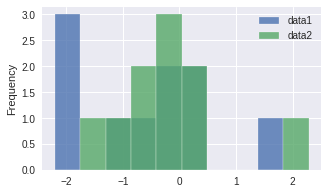

In [ ]:
data.plot.hist(alpha=.8,figsize=(5,3));

#### One Sample T test

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
data1,10.0,-0.564590,1.260859,-2.200233,-1.752491,-0.32348,0.065744,1.766438
data2,10.0,-0.035974,0.980542,-1.355678,-0.494399,-0.11048,0.210083,2.282740


This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean.

In [ ]:
H0 = 'the population mean is equal to a mean of {}'
a = 0.05

hypothesized_population_mean = 1.5

stat, p = ss.ttest_1samp(data['data1'],hypothesized_population_mean)
print(f'Statistic: {stat}\nP-Value: {p:.4f}')
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0.format(hypothesized_population_mean)}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0.format(hypothesized_population_mean)}')

Statistic: -5.1780647040905325
P-Value: 0.0006
Statistically significant / We can trust the statistic
Reject H0: the population mean is equal to a mean of 1.5


#### Unpaired T test

An unpaired t-test (also known as an independent t-test) is a statistical procedure that compares the averages/means of two independent or unrelated groups to determine if there is a significant difference between the two

In [ ]:
H0 = 'the means of both populations are equal'
a = 0.05

stat, p = ss.ttest_ind(data['data1'],data['data2'])
print(f'Statistic: {stat}\nP-Value: {p:.3f}')
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')


Statistic: -1.0465644559040281
P-Value: 0.309
Statistically not significant / We cannot trust the statistic
Accept H0: the means of both populations are equal


#### Paired T test

The paired sample t-test, sometimes called the dependent sample t-test, is a statistical procedure used to determine whether the mean difference between two sets of observations is zero. In a paired sample t-test, each subject or entity is measured twice, resulting in pairs of observations.

In [ ]:
H0 = 'means difference between two sample is 0'
a = 0.05

stat, p = ss.ttest_rel(data['data1'],data['data2'])
print(f'Statistic: {stat}\nP-Value: {p:.3f}')
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')


Statistic: -1.0430434002617406
P-Value: 0.324
Statistically not significant / We cannot trust the statistic
Accept H0: means difference between two sample is 0


### ANOVA test

ANOVA determines whether the groups created by the levels of the independent variable are statistically different by calculating whether the means of the treatment levels are different from the overall mean of the dependent variable.

The null hypothesis (H0) of ANOVA is that there is no difference among group means. 

The alternate hypothesis (Ha) is that at least one group differs significantly from the overall mean of the dependent variable.

The assumptions of the ANOVA test are the same as the general assumptions for any parametric test:

- Independence of observations: the data were collected using statistically-valid methods, and there are no hidden relationships among observations. If your data fail to meet this assumption because you have a confounding variable that you need to control for statistically, use an ANOVA with blocking variables.
- Normally-distributed response variable: The values of the dependent variable follow a normal distribution.
- Homogeneity of variance: The variation within each group being compared is similar for every group. If the variances are different among the groups, then ANOVA probably isn’t the right fit for the data.

In [ ]:
data.mean()

data1   -0.564590
data2   -0.035974
dtype: float64

In [ ]:
H0 = 'two or more groups have the same population mean'
a = 0.05

stat, p = ss.f_oneway(data['data1'],data['data2'])
print(f'Statistic: {stat}\nP-Value: {p:.3f}')
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')


Statistic: 1.0952971603616946
P-Value: 0.309
Statistically not significant / We cannot trust the statistic
Accept H0:  two or more groups have the same population mean


### Linear Regression

It is used when we want to predict the value of a variable based on the value of another variable. The variable we want to predict is called the dependent variable (or sometimes, the outcome variable). The variable we are using to predict the other variable's value is called the independent variable (or sometimes, the predictor variable). 

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

Regression coefficients represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant. This statistical control that regression provides is important because it isolates the role of one variable from all of the others in the model.

The key to understanding the coefficients is to think of them as slopes, and they’re often called slope coefficients. 

In [ ]:
reg_data = pd.DataFrame({
    'data1': np.random.gamma(25,size=20)
})

reg_data['data2'] = reg_data['data1'].apply(lambda x: x + np.random.randint(1,25))
reg_data[:5]

,data1,data2
0,21.403142,25.403142
1,31.252916,35.252916
2,22.933164,42.933164
3,20.455040,30.455040
4,25.948037,28.948037


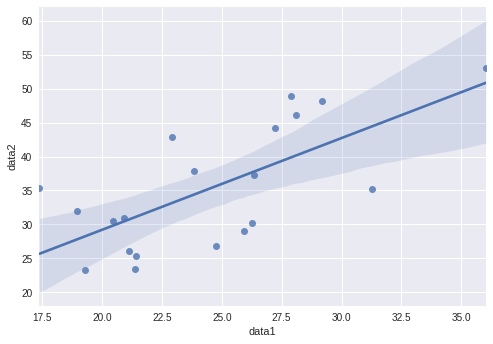

In [ ]:
sns.regplot(x=reg_data['data1'],y=reg_data['data2']);

In [ ]:
slope, intercept, r, p, se = ss.linregress(reg_data['data1'], reg_data['data2'])

print(f'Slope: {slope}\nIntercept: {intercept}\nP-Value: {p}\nr: {r}\nse: {se}')

H0 = 'changes in the predictor are not associated with changes in the response'
a = 0.05
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')

Slope: 1.3536514855760986
Intercept: 2.1239248669953383
P-Value: 0.0007791282263931652
r: 0.6890350363826457
se: 0.33558640994910627
Statistically significant / We can trust the statistic
Reject H0: changes in the predictor are not associated with changes in the response


### Pearson correlation

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. 

Correlations of -1 or +1 imply an exact linear relationship. 

**Positive correlations imply that as x increases, so does y.** 

**Negative correlations imply that as x increases, y decreases.**

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

In [ ]:
H0 = 'the two variables are uncorrelated'
a = 0.05

stat, p = ss.pearsonr(data['data1'],data['data2'])
print(f'Statistic: {stat}\nP-Value: {p:.3f}')
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')

Statistic: -0.0069778154571835905
P-Value: 0.985
Statistically not significant / We cannot trust the statistic
Accept H0: the two variables are uncorrelated


### Chi-Square Test

There are two types of chi-square tests. Both use the chi-square statistic and distribution for different purposes:

- A chi-square goodness of fit test determines if sample data matches a population

- A chi-square test for independence compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.
    - A very small chi square test statistic means that your observed data fits your expected data extremely well. In other words, there is a relationship.
    - A very large chi square test statistic means that the data does not fit very well. In other words, there isn’t a relationship.

In [ ]:
animals = ['dog','cat','horse','dragon','unicorn']

chi_data = pd.DataFrame({x:[np.random.randint(5,25) for _ in range(3)] for x in animals},index=['village1','village2','village3'])
chi_data

,dog,cat,horse,dragon,unicorn
village1,24,22,21,14,8
village2,17,14,10,22,5
village3,14,10,15,10,13


If our calculated value of chi-square is less or equal to the tabular(also called critical) value of chi-square, then H0 holds true.

In [ ]:
H0 = 'no relation between the variables'
a = 0.05

stat, p = ss.chisquare(chi_data['dog'])
print(f'Statistic: {stat}\nP-Value: {p:.3f}')
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')

Statistic: 2.8727272727272726
P-Value: 0.238
Statistically not significant / We cannot trust the statistic
Accept H0: no relation between the variables


In [ ]:
H0 = 'no relation between the variables'
a = 0.05

stat, p, dof, expected = ss.chi2_contingency(chi_data.values)
print(f'Statistic: {stat}\nP-Value: {p:.3f}\nDOF: {dof}')
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')

Statistic: 15.604347636638956
P-Value: 0.048
DOF: 8
Statistically significant / We can trust the statistic
Reject H0: no relation between the variables


### Fischer's test

Use the Fisher's exact test of independence when you have two nominal variables and you want to see whether the proportions of one variable are different depending on the value of the other variable. Use it when the sample size is small.

The null hypothesis is that the relative proportions of one variable are independent of the second variable; in other words, the proportions at one variable are the same for different values of the second variable

In [ ]:
fisher_data = chi_data[1:].T[3:]
fisher_data

,village2,village3
dragon,22,10
unicorn,5,13


In [ ]:
H0 = 'the two groups are independet'
a = 0.05

oddsratio, expected = ss.fisher_exact(fisher_data)
print(f'Odds Ratio: {oddsratio}\nP-Value: {p:.3f}')
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')

Odds Ratio: 5.72
P-Value: 0.048
Statistically significant / We can trust the statistic
Reject H0: the two groups are independet


### Spearman's rank correlation

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. 

Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. 

Correlations of -1 or +1 imply an exact monotonic relationship. 

**Positive correlations imply that as x increases, so does y.**

**Negative correlations imply that as x increases, y decreases.**

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. 

In [ ]:
H0 = 'the two variables are uncorrelated'
a = 0.05

stat, p = ss.spearmanr(data['data1'],data['data2'])
print(f'Statistic: {stat}\nP-Value: {p:.3f}')
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')


Statistic: -0.05454545454545454
P-Value: 0.881
Statistically not significant / We cannot trust the statistic
Accept H0: the two variables are uncorrelated


### References


- [Parametric and Non-Parametric tests](http://www.stats.ox.ac.uk/~winkel/stat2l5+1up.pdf)
- [Choosing Between a Nonparametric Test and a Parametric Test](https://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)
- [Parametric Non-parametric tests](https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1b-statistical-methods/parametric-nonparametric-tests)
- [Test Statistics](https://www.scribbr.com/statistics/test-statistic/)
- [Choosing the Right Statistical Test](https://www.scribbr.com/statistics/statistical-tests/)
- [In Depth Linear Regression](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)
- [Fisher's exact test](https://www.sheffield.ac.uk/polopoly_fs/1.43998!/file/tutorial-9-fishers.pdf)

## Applying Statistical Tests

### About Data


[Dataset & Data Dictionary](https://www.kaggle.com/goldenoakresearch/us-acs-mortgage-equity-loans-rent-statistics)

**Statistical Themes:**

Note: in total there are 75 fields the following are just themes the fields fall under

- **Home Owner Costs:** Sum of utilities, property taxes.
- **Second Mortgage:** Households with a second mortgage statistics.
- **Home Equity Loan:** Households with a Home equity Loan statistics.
- **Debt:** Households with any type of debt statistics.
- **Mortgage Costs:** Statistics regarding mortgage payments, home equity loans, utilities and property taxes
- **Home Owner Costs:** Sum of utilities, property taxes statistics
- **Gross Rent:** Contract rent plus the estimated average monthly cost of utility features
- **Gross Rent as Percentof Income Gross rent:** as the percent of income very interesting
- **High school Graduation:** High school graduation statistics.
- **Population Demographics:** Population demographic statistics.
- **Age Demographics:** Age demographic statistics.
- **Household Income:** Total income of people residing in the household.
- **Family Income:** Total income of people related to the householder.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/real_estate_db.csv',encoding='latin8')
df[:3]

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,220336,NaN,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,tract,99685,907,53.621091,-166.770979,2823180154,3101986247,4619,2725,1894,1366.24657,1405.0,650.16380,131.50967,372.0,0.85676,0.65676,0.47838,0.35405,0.28108,0.21081,0.15135,0.12432,661,370,107394.63092,92807.0,70691.05352,329.85389,874.0,114330.20465,101229.0,63955.77136,161.15239,519.0,2266.22562,2283.0,768.53497,41.65644,155.0,840.67205,776.0,341.85580,58.0,29.74375,0.00469,0.01408,0.02817,0.72770,0.50216,0.77143,0.30304,0.82841,0.82784,0.82940,38.45838,39.25000,17.65453,709.06255,2725.0,32.78177,31.91667,19.31875,440.46429,1894.0,0.25053,0.47388,0.30134,0.03443,0.09802
1,220342,NaN,140,20,2,Alaska,AK,Eagle River,Anchorage,City,tract,99577,907,61.174250,-149.284329,509234898,1859309,3727,1780,1947,2347.69441,2351.0,382.73576,4.32064,44.0,0.79545,0.56818,0.56818,0.45455,0.20455,0.20455,0.20455,0.00000,50,44,136547.39117,119141.0,84268.79529,288.40934,1103.0,148641.70829,143026.0,69628.72286,159.20875,836.0,2485.10777,2306.0,919.76234,180.92883,797.0,712.33066,742.0,336.98847,256.0,159.32270,0.03609,0.06078,0.07407,0.75689,0.15520,0.56228,0.23925,0.94090,0.97253,0.91503,37.26216,39.33333,19.66765,503.83410,1780.0,38.97956,39.66667,20.05513,466.65478,1947.0,0.94989,0.52381,0.01777,0.00782,0.13575
2,220343,NaN,140,20,2,Alaska,AK,Jber,Anchorage,City,tract,99505,907,61.284745,-149.653973,270593047,66534601,8736,5166,3570,2071.30766,2089.0,442.89099,195.07816,1749.0,0.99469,0.97403,0.92680,0.89020,0.73022,0.62574,0.54368,0.32999,1933,1694,69361.23167,57976.0,45054.38537,1104.22753,1955.0,67678.50158,58248.0,38155.76319,1023.98149,1858.0,NaN,NaN,NaN,NaN,NaN,525.89101,810.0,392.27170,22.0,10.83444,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.99097,0.99661,0.98408,21.96291,22.25000,11.09657,1734.05720,5166.0,22.20427,23.16667,13.86575,887.67805,3570.0,0.00759,0.50459,0.06676,0.01000,0.01838


In [ ]:
cols = ['state','state_ab','city','area_code','lat','lng','ALand','AWater','pop','male_pop','female_pop','debt','married','divorced','separated']
cdf = df[cols].copy()

### EDA

**Fancy scatter plot by Latitutde and Longitude**

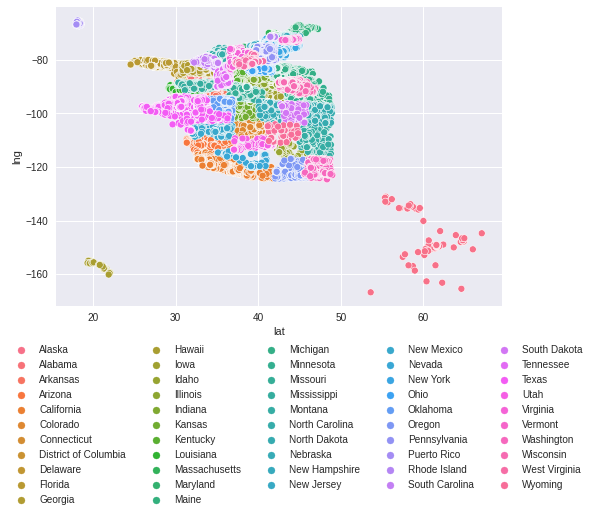

In [ ]:
sns.scatterplot(data=cdf,x='lat',y='lng',hue='state');
plt.legend(bbox_to_anchor=(1.2, -0.1),fancybox=False, shadow=False, ncol=5);

**Summary of population and area by state**

In [ ]:
summary = cdf.groupby('state_ab').agg({'pop':'sum','male_pop':'sum','female_pop':'sum','ALand':'sum','AWater':'sum','state':'first'})
summary

,pop,male_pop,female_pop,ALand,AWater,state
state_ab,,,,,,
AK,469126,246520,222606,722368907357,137757072654,Alaska
AL,2516214,1226877,1289337,70352962626,1732053991,Alabama
AR,1540462,758011,782451,69537343629,1484286648,Arkansas
AZ,3491125,1737284,1753841,180325081831,662716229,Arizona
CA,20197555,10081248,10116307,235174645131,4507004866,California
CO,2799395,1411330,1388065,155452913241,711290617,Colorado
CT,1914899,924516,990383,6865055353,312560243,Connecticut
DC,357842,172707,185135,89106477,13002616,District of Columbia
DE,488669,236762,251907,2877996732,114847579,Delaware


**Male and Female distribution by state**

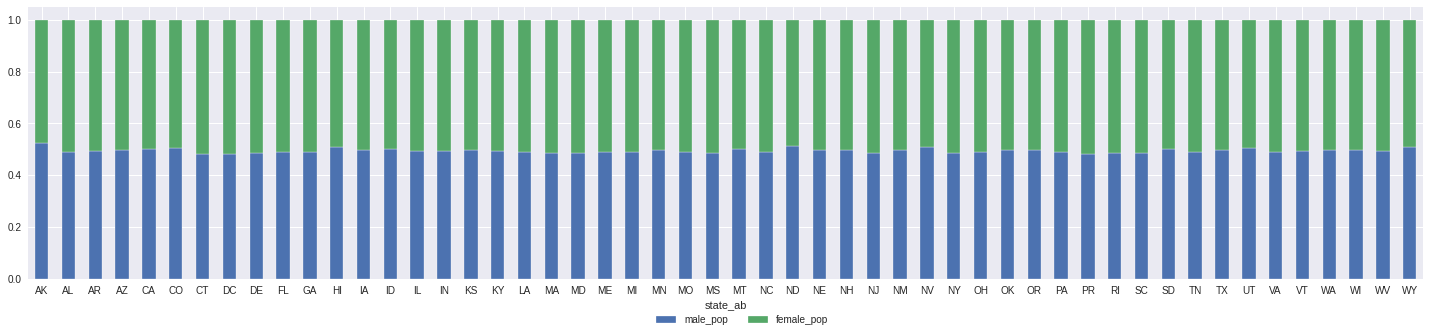

In [ ]:
summary[['male_pop','female_pop']] \
.div(summary['pop'],axis=0) \
.plot.bar(stacked=True,rot=0,figsize=(25,5)) \
.legend(bbox_to_anchor=(0.58, -0.1),fancybox=False, shadow=False, ncol=2);

**States distribution by Land and Water**

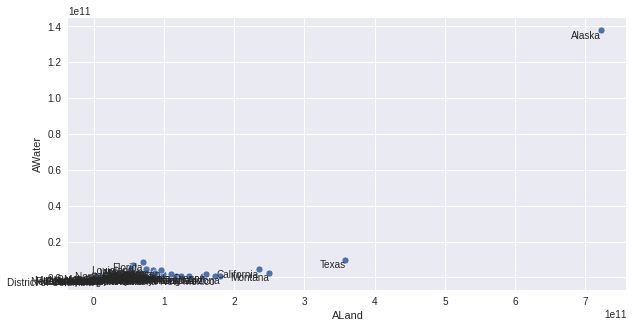

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=summary.reset_index(),x='ALand',y='AWater')

for x in summary.reset_index().itertuples():
    plt.annotate(x.state,(x.ALand,x.AWater),va='top',ha='right');


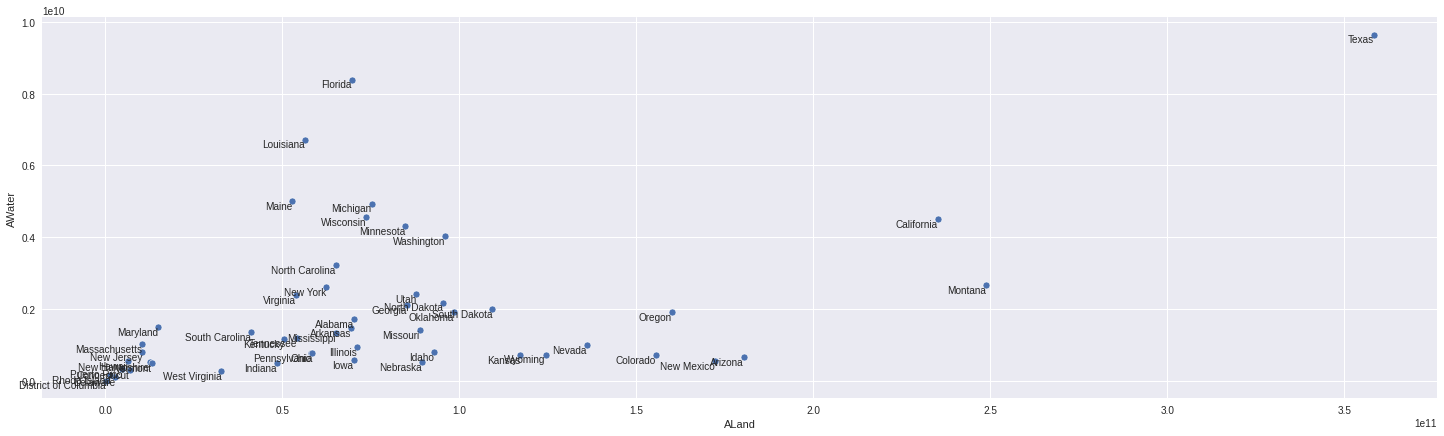

In [ ]:
plt.figure(figsize=(25,7))
sns.scatterplot(data=summary[summary.state != 'Alaska'],x='ALand',y='AWater');

for x in summary[summary.state != 'Alaska'].itertuples():
    plt.annotate(x.state,(x.ALand,x.AWater),va='top',ha='right');


### Let's find some hypotheses

First let's look if we have some correlations between our variables

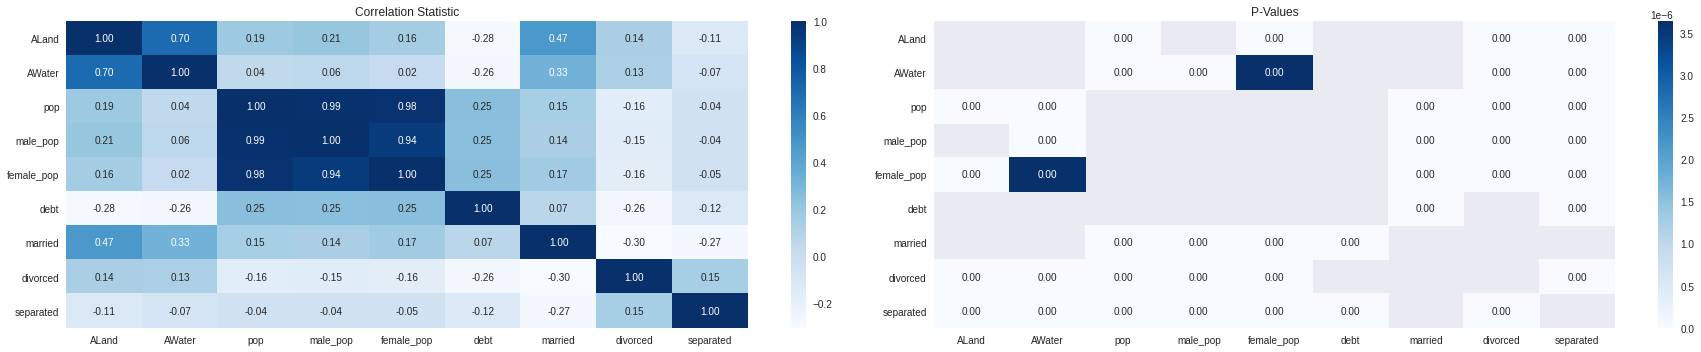

In [ ]:
corr_data = cdf.select_dtypes(exclude=['object']).drop(['area_code','lat','lng'],axis=1).copy().dropna()
corr_matrix = pd.DataFrame([[ss.spearmanr(corr_data[c_x],corr_data[c_y])[1] for c_x in corr_data.columns] for c_y in corr_data.columns],columns=corr_data.columns,index=corr_data.columns)
corr_matrix[corr_matrix == 0] = np.nan
fig,ax = plt.subplots(1,2,figsize=(25,5))

sns.heatmap(corr_data.corr(method='spearman'),annot=True,fmt='.2f',ax=ax[0],cmap='Blues')
ax[0].set_title('Correlation Statistic')

sns.heatmap(corr_matrix,annot=True,fmt='.2f',ax=ax[1],cmap='Blues')
ax[1].set_title('P-Values')

plt.tight_layout()

**H:** Is there a corelation between the Land area and number of people - Expect to see the more land, the more people

Slope: -0.00000
Intercept: 4338.79206
P-Value: 0.00000
r: -0.03189
se: 0.00000
Statistically significant / We can trust the statistic
Reject H0: changes in the predictor are not associated with changes in the response


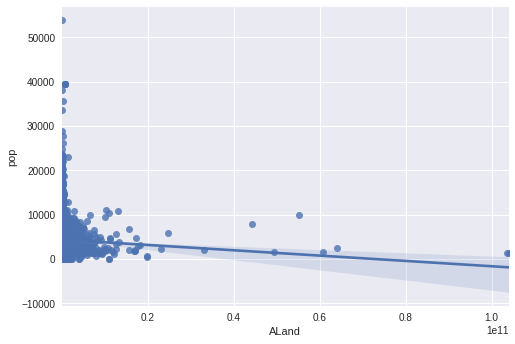

In [ ]:
sns.regplot(x=cdf['ALand'],y=cdf['pop']);

slope, intercept, r, p, se = ss.linregress(cdf['ALand'],cdf['pop'])

print(f'Slope: {slope:.5f}\nIntercept: {intercept:.5f}\nP-Value: {p:.5f}\nr: {r:.5f}\nse: {se:.5f}')

H0 = 'changes in the predictor are not associated with changes in the response'
a = 0.05
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')

**H:** Is there a correlation between the percentage of debt and city population - Expect to see more debt where more people

In [ ]:
H0 = 'the two variables are uncorrelated'
a = 0.05
tmp = cdf.dropna(subset=['pop','debt'])
stat, p = ss.pearsonr(tmp['pop'],tmp['debt'])
print(f'Statistic: {stat}\nP-Value: {p:.3f}')
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')

Statistic: 0.2346457692137584
P-Value: 0.000
Statistically significant / We can trust the statistic
Reject H0: the two variables are uncorrelated


**H:** There is a relationship between the male population and female population

Slope: 0.90511
Intercept: 268.73639
P-Value: 0.00000
r: 0.91270
se: 0.00205
Statistically significant / We can trust the statistic
Reject H0: changes in the predictor are not associated with changes in the response


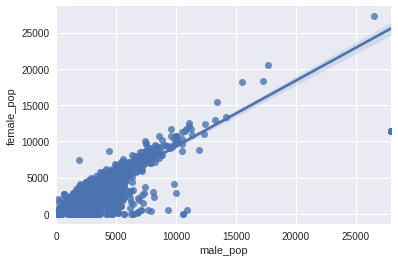

In [ ]:
sns.regplot(x=cdf['male_pop'],y=cdf['female_pop']);

slope, intercept, r, p, se = ss.linregress(cdf['male_pop'],cdf['female_pop'])

print(f'Slope: {slope:.5f}\nIntercept: {intercept:.5f}\nP-Value: {p:.5f}\nr: {r:.5f}\nse: {se:.5f}')

H0 = 'changes in the predictor are not associated with changes in the response'
a = 0.05
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')

In [ ]:
H0 = 'two or more groups have the same population mean'
a = 0.05

stat, p = ss.f_oneway(cdf['male_pop'],cdf['female_pop'])
print(f'Statistic: {stat}\nP-Value: {p:.3f}')
if p <= a:
    print('Statistically significant / We can trust the statistic')
    print(f'Reject H0: {H0}')
else:
    print('Statistically not significant / We cannot trust the statistic')
    print(f'Accept H0: {H0}')


Statistic: 70.82427410415444
P-Value: 0.000
Statistically significant / We can trust the statistic
Reject H0: two or more groups have the same population mean


## Conclusions

- Statistical tests are great for hypothesis testing
- Is very important to know what type of test to use and when to use it, but you can do that just by looking at your variables

Follow up topics and questions:
- Have a look on Harvey-Collier multiplier test for linearity
- How do we meassure right the statistic from each test
- When having a P-Value == 0 mens the test failed and when not
